<a href="https://colab.research.google.com/github/jordanburdett/IrisflowerDetection/blob/master/LearningKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


The first dataset that I will be using to learn Keras. The goal is to predict if a car is acceptable based off of 6 features.

In [0]:
names = ["price", "maint", "doors", "numPeople", "cargoSpace", "safteyMeasure", "acceptable"]
carData = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=None, skipinitialspace=True, names=names, na_values=["?"])

First we need to get rid of all the string data and tokenize it.

In [0]:
def makeCatCodes(data):
  for label,dtype in data.dtypes.items():
    if dtype == object:
        print(label)
        # set the dataframe to be a category
        data[label] = data[label].astype('category')

        # create new row using cat codes
        data["{}_cat".format(label)] = data[label].cat.codes
        
  return data

In [4]:
carData = makeCatCodes(carData)

features = carData[['price_cat', 'maint_cat', 'doors_cat', 'numPeople_cat', 'cargoSpace_cat', 'safteyMeasure_cat']].to_numpy()
targets = carData['acceptable_cat'].to_numpy()


price
maint
doors
numPeople
cargoSpace
safteyMeasure
acceptable


In [5]:
targets[:5]

array([2, 2, 2, 2, 2], dtype=int8)

In [0]:
train_data, test_data, train_targets, test_targets = train_test_split(features, targets, test_size=.3)


In [0]:
model = Sequential()
model.add(Dense(200, activation='relu', input_dim=6))
model.add(Dense(100,activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
model.fit(train_data, train_targets, epochs=100)

Epoch 1/100
1209/1209 [==============================] - 2s 1ms/step - loss: 0.8908 - accuracy: 0.6485
Epoch 2/100
1209/1209 [==============================] - 0s 77us/step - loss: 0.7126 - accuracy: 0.7055
Epoch 3/100
1209/1209 [==============================] - 0s 74us/step - loss: 0.6542 - accuracy: 0.7072
Epoch 4/100
1209/1209 [==============================] - 0s 71us/step - loss: 0.6021 - accuracy: 0.7328
Epoch 5/100
1209/1209 [==============================] - 0s 80us/step - loss: 0.5498 - accuracy: 0.7577
Epoch 6/100
1209/1209 [==============================] - 0s 77us/step - loss: 0.4879 - accuracy: 0.8031
Epoch 7/100
1209/1209 [==============================] - 0s 73us/step - loss: 0.4324 - accuracy: 0.8180
Epoch 8/100
1209/1209 [==============================] - 0s 74us/step - loss: 0.3857 - accuracy: 0.8371
Epoch 9/100
1209/1209 [==============================] - 0s 71us/step - loss: 0.3485 - accuracy: 0.8470
Epoch 10/100
1209/1209 [==============================] - 0s 70us

In [9]:
model.predict(test_data)

array([[2.5167977e-18, 4.1396564e-29, 1.0000000e+00, 7.6271360e-36],
       [9.5703979e-11, 3.4578725e-16, 1.0000000e+00, 2.3205919e-25],
       [9.9684441e-01, 1.7837763e-05, 1.3789864e-06, 3.1363762e-03],
       ...,
       [8.5954893e-01, 5.7189723e-06, 1.4044529e-01, 9.9941656e-17],
       [9.8058689e-01, 6.8030239e-12, 1.9413074e-02, 2.1404411e-24],
       [1.2322470e-15, 2.1437904e-33, 1.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [10]:
pred_train = model.predict(train_data)
scores = model.evaluate(train_data, train_targets, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test = model.predict(test_data)
scores2 = model.evaluate(test_data, test_targets, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

Accuracy on training data: 1.0% 
 Error on training data: 0.0
Accuracy on test data: 0.9903661012649536% 
 Error on test data: 0.009633898735046387


The first attempt at using the model was very successful getting around 97% accuracy each time. Tweaking some of the parameters I was able to get it up to 99%. The biggest mistake I had with this model was when I categorized the data the features had a value of either 1,2,3,4 which made it so I had to allow for 4 outpus rather than 3. Once I pre processed the data a little better I was able to get better accuracy.

The second dataset that I will be doing for this project is using census data to determine if someone makes more that 50,000 dollars a year.

In [0]:
headers = ["age", "workType", "id", "education", "educationNumber", "maritalStatus", "occupation", "relationship", "race", "sex", "gain", "loss", "hoursPerWeek", "country", "income"]
censusTrainData = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=headers, na_values='?')

censusTestData = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=headers, na_values="?")

In [12]:
censusTrainData = makeCatCodes(censusTrainData)

trainData = censusTrainData[['age', 'workType_cat', 'educationNumber', 'maritalStatus_cat', 'occupation_cat', 'relationship_cat', 'race_cat', 'sex_cat', 'gain', 'loss', 'hoursPerWeek', 'country_cat']]
trainTargets = censusTrainData['income_cat']

censusTestData = makeCatCodes(censusTestData)
testData = censusTestData[['age', 'workType_cat', 'educationNumber', 'maritalStatus_cat', 'occupation_cat', 'relationship_cat', 'race_cat', 'sex_cat', 'gain', 'loss', 'hoursPerWeek', 'country_cat']]
testTargets = censusTestData['income_cat']


workType
education
maritalStatus
occupation
relationship
race
sex
country
income
age
workType
education
maritalStatus
occupation
relationship
race
sex
country
income


In [13]:
print(trainData.dtypes)
print(trainTargets.dtypes)
print(testData.dtypes)
print(testTargets.dtypes)

age                  int64
workType_cat          int8
educationNumber      int64
maritalStatus_cat     int8
occupation_cat        int8
relationship_cat      int8
race_cat              int8
sex_cat               int8
gain                 int64
loss                 int64
hoursPerWeek         int64
country_cat           int8
dtype: object
int8
age                  category
workType_cat             int8
educationNumber       float64
maritalStatus_cat        int8
occupation_cat           int8
relationship_cat         int8
race_cat                 int8
sex_cat                  int8
gain                  float64
loss                  float64
hoursPerWeek          float64
country_cat              int8
dtype: object
int8


In [14]:
trainData.head()

,age,workType_cat,educationNumber,maritalStatus_cat,occupation_cat,relationship_cat,race_cat,sex_cat,gain,loss,hoursPerWeek,country_cat
0,39,7,13,4,1,1,4,1,2174,0,40,39
1,50,6,13,2,4,0,4,1,0,0,13,39
2,38,4,9,0,6,1,4,1,0,0,40,39
3,53,4,7,2,6,0,2,1,0,0,40,39
4,28,4,13,2,10,5,2,0,0,0,40,5


In [0]:
trainData = trainData.to_numpy()
trainTargets = trainTargets.to_numpy()

testData = testData.to_numpy()
testTargets = testTargets.to_numpy()

In [0]:
model = Sequential()
model.add(Dense(250, activation='relu', input_dim=12))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adamax', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [17]:
model.fit(trainData, trainTargets, epochs=20, batch_size=10)

Epoch 1/20
32561/32561 [==============================] - 7s 227us/step - loss: 3.5588 - accuracy: 0.7923
Epoch 2/20
32561/32561 [==============================] - 7s 223us/step - loss: 2.1390 - accuracy: 0.8136
Epoch 3/20
32561/32561 [==============================] - 7s 220us/step - loss: 1.7687 - accuracy: 0.8199
Epoch 4/20
32561/32561 [==============================] - 7s 216us/step - loss: 1.4652 - accuracy: 0.8226
Epoch 5/20
32561/32561 [==============================] - 7s 214us/step - loss: 1.2433 - accuracy: 0.8262
Epoch 6/20
32561/32561 [==============================] - 7s 219us/step - loss: 0.9342 - accuracy: 0.8294
Epoch 7/20
32561/32561 [==============================] - 7s 218us/step - loss: 1.1448 - accuracy: 0.8297
Epoch 8/20
32561/32561 [==============================] - 7s 219us/step - loss: 0.8374 - accuracy: 0.8307
Epoch 9/20
32561/32561 [==============================] - 7s 216us/step - loss: 0.6931 - accuracy: 0.8349
Epoch 10/20
32561/32561 [=====================

Third data set will be about heart diseases. based off of 14 features we will dertmine if an individual is sick. outputs are 0,1,2,3,4. 0 being sick 4 being very sick

In [18]:
header = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

heartData = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", names=header, na_values="?")

heartData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [19]:
heartData.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
num         False
dtype: bool

In [20]:
heartData.dropna()
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [21]:
features = heartData[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]].to_numpy()
targets = heartData['num'].to_numpy()

for index in range(len(targets)):
  if targets[index] > 0:
    targets[index] = 1

targets

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [22]:
train_data, test_data, train_targets, test_targets = train_test_split(features, targets, test_size=.10)

print (len(train_data))
print("----------------")
print (len(train_targets))

272
----------------
272


In [0]:
del model
model = Sequential()
model.add(Dense(500, activation="relu", input_dim=13))
model.add(Dense(250, activation="relu"))
model.add(Dense(120, activation="relu"))
model.add(Dense(60, activation="relu"))
model.add(Dense(2, activation="softmax"))


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [24]:
model.fit(train_data, train_targets, epochs=50)

Epoch 1/50
272/272 [==============================] - 0s 458us/step - loss: 4.5420 - accuracy: 0.4706
Epoch 2/50
272/272 [==============================] - 0s 97us/step - loss: 0.6925 - accuracy: 0.5441
Epoch 3/50
272/272 [==============================] - 0s 100us/step - loss: 0.6920 - accuracy: 0.5441
Epoch 4/50
272/272 [==============================] - 0s 99us/step - loss: 0.6917 - accuracy: 0.5441
Epoch 5/50
272/272 [==============================] - 0s 115us/step - loss: 0.6912 - accuracy: 0.5441
Epoch 6/50
272/272 [==============================] - 0s 113us/step - loss: 0.6909 - accuracy: 0.5441
Epoch 7/50
272/272 [==============================] - 0s 109us/step - loss: 0.6905 - accuracy: 0.5441
Epoch 8/50
272/272 [==============================] - 0s 111us/step - loss: 0.6902 - accuracy: 0.5441
Epoch 9/50
272/272 [==============================] - 0s 131us/step - loss: 0.6899 - accuracy: 0.5441
Epoch 10/50
272/272 [==============================] - 0s 116us/step - loss: 0.6897 

In [25]:
pred_train = model.predict(train_data)
scores = model.evaluate(train_data, train_targets, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test = model.predict(test_data)
scores2 = model.evaluate(test_data, test_targets, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

Accuracy on training data: 0.5441176295280457% 
 Error on training data: 0.45588237047195435
Accuracy on test data: 0.5161290168762207% 
 Error on test data: 0.4838709831237793


In [133]:
from collections import Counter

names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model", "origin", "carname"]
carMPG = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", header=None, names=names, na_values=["?"], sep="\s+")

from sklearn.preprocessing import normalize

def replaceNaNAverage(data):
  testColumn = data.isna().any()

  # Loop through all isNa columns
  for columnName, hasNaN in testColumn.items():
      if hasNaN:
          counts = Counter(data[columnName])
          data[columnName] = data[columnName].fillna(counts.most_common(1)[0][0])
  return data

def normalizeData(data):
  return (data - data.mean()) / (data.max() - data.min())

carMPG = replaceNaNAverage(carMPG)

print(carMPG)

features = carMPG[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin']].to_numpy()
targets = carMPG['mpg'].to_numpy()

features = normalize(features, norm='l2')
print(features)

train_data, test_data, train_targets, test_targets = train_test_split(features, targets, test_size=.10)

      mpg  cylinders  displacement  ...  model  origin                    carname
0    18.0          8         307.0  ...     70       1  chevrolet chevelle malibu
1    15.0          8         350.0  ...     70       1          buick skylark 320
2    18.0          8         318.0  ...     70       1         plymouth satellite
3    16.0          8         304.0  ...     70       1              amc rebel sst
4    17.0          8         302.0  ...     70       1                ford torino
..    ...        ...           ...  ...    ...     ...                        ...
393  27.0          4         140.0  ...     82       1            ford mustang gl
394  44.0          4          97.0  ...     82       2                  vw pickup
395  32.0          4         135.0  ...     82       1              dodge rampage
396  28.0          4         120.0  ...     82       1                ford ranger
397  31.0          4         119.0  ...     82       1                 chevy s-10

[398 rows x 9 c

In [0]:
model = Sequential()
model.add(Dense(500, activation="relu", input_dim=7))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))


model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001), 
              loss='mae', 
              metrics=['mae', 'mse'])

In [169]:
model.fit(train_data, train_targets, epochs=150)

Epoch 1/150
358/358 [==============================] - 0s 111us/step - loss: 2.8045 - mae: 2.8045 - mse: 14.6274
Epoch 2/150
358/358 [==============================] - 0s 89us/step - loss: 2.9213 - mae: 2.9213 - mse: 16.5683
Epoch 3/150
358/358 [==============================] - 0s 85us/step - loss: 2.8272 - mae: 2.8272 - mse: 15.5111
Epoch 4/150
358/358 [==============================] - 0s 84us/step - loss: 2.8871 - mae: 2.8871 - mse: 16.0623
Epoch 5/150
358/358 [==============================] - 0s 85us/step - loss: 2.8599 - mae: 2.8599 - mse: 15.1981
Epoch 6/150
358/358 [==============================] - 0s 83us/step - loss: 3.0037 - mae: 3.0037 - mse: 16.0929
Epoch 7/150
358/358 [==============================] - 0s 84us/step - loss: 2.9405 - mae: 2.9405 - mse: 15.6718
Epoch 8/150
358/358 [==============================] - 0s 85us/step - loss: 2.8821 - mae: 2.8821 - mse: 15.9834
Epoch 9/150
358/358 [==============================] - 0s 83us/step - loss: 2.9419 - mae: 2.9419 - mse:

In [0]:
predictions = model.predict(test_data)

In [171]:
import sklearn.metrics as sk

# variance score
print("Variance Score")
print(sk.explained_variance_score(test_targets, predictions))

# max error
from sklearn.metrics import max_error
print("max error")
print(max_error(test_targets, predictions))

# mean absolute error
from sklearn.metrics import mean_absolute_error
print("mean absolute error")
print(mean_absolute_error(test_targets, predictions))

# Mean squared error
from sklearn.metrics import mean_squared_error
print("mean squared error")
print(mean_squared_error(test_targets, predictions))


# Mean squared log error
print ("mean squared log error")
print(sk.mean_squared_log_error(test_targets, predictions))

# r2 score
print ("r2 score")
print (sk.r2_score(test_targets, predictions))

Variance Score
0.8464509966617164
max error
13.117713928222656
mean absolute error
4.9422805213928225
mean squared error
31.309842893030634
mean squared log error
0.06348962939319457
r2 score
0.38185875879477393


With the first attempt I was able to get a variance score of 86% and a mean error of 2.02 r2 score 85%. I will use the car data set to try and get better predictions for miles per gallon.



---

Sigmoid function: Terrible horrible results... haha

---


tanh: No Better than sigmoid

---


selu: Better but not as good as relu

---


elu: Good but not as good as relu or selu

---
Decreasing the learning rate with the adam optimizer to .0001 increases results slightly but requires training for double the amount of iterations.


In [0]:
error = test_targets - predictions

In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

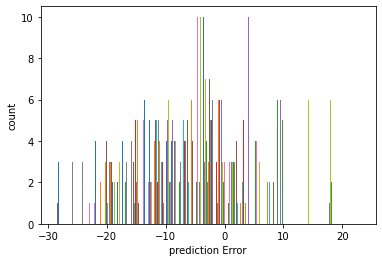

In [174]:
plt.hist(error, bins = 25)
plt.xlabel("prediction Error")
plt.ylabel("count")